In [1]:
from __future__ import division
import math, sys
import numpy as np
import numpy.random as rd
import pandas as pd
import scipy
from scipy import stats as st
from datetime import  datetime as dt
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

sns.set(style="whitegrid", palette="muted", color_codes=True)

In [3]:

from matplotlib.colors import LinearSegmentedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

cm = generate_cmap(['lightblue', 'mediumblue', 'mediumblue','black', 'red', 'red', 'orangered'])

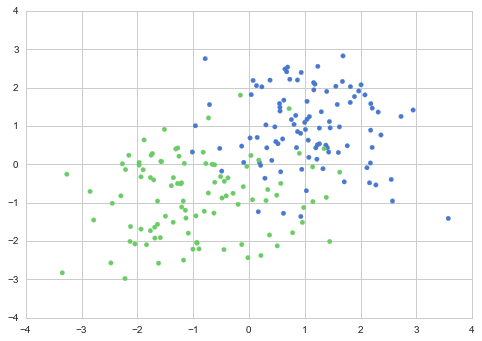

In [4]:
# Create test data
rd.seed(71)
x1 = st.multivariate_normal.rvs(mean=[ 1, 1], cov=1, size=100)
x2 = st.multivariate_normal.rvs(mean=[-1,-1], cov=1, size=100)
x = np.r_[x1, x2]

g1 = np.ones(100)
g2 = np.zeros(100)
g = np.r_[g1, g2]
label = list(map(lambda x: "g" if x==0 else "b", g))
plt.scatter(x[:,0],x[:,1] ,color=label)

In [8]:
# Linear model
from sklearn import linear_model

X = np.c_[np.ones(len(x)), x]

clf = linear_model.LinearRegression()
print(clf.fit (X, g))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [9]:
b = clf.coef_
print("b0:", b[0], ", b1:", b[1], ", b2:", b[2])

b0: 0.0 , b1: 0.177607125896 , b2: 0.160278010242


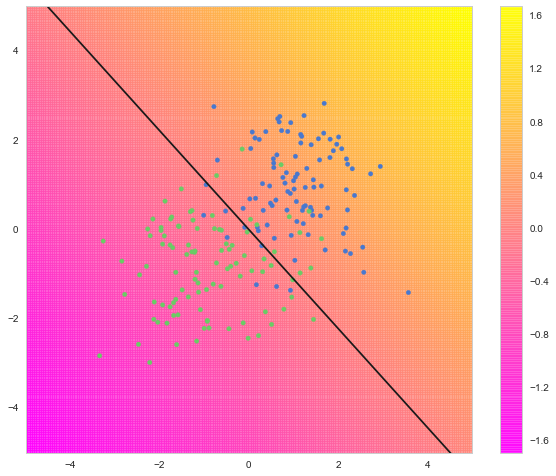

In [10]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 201), np.linspace(-5, 5, 201))

# 色でプロット
z = b[0] + b[1]*xx + b[2]*yy
# z=0の直線
y = -(b[0]/b[2]) - (b[1]/b[2])*np.linspace(-5, 5, 201)

plt.figure(figsize=(10,8))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
pc = plt.pcolor(xx, yy, z, alpha=0.8)
plt.spring()
plt.scatter(x[:,0],x[:,1] ,color=label)
plt.plot(np.linspace(-5, 5, 201), y, c="k")
plt.colorbar(pc)
plt.show()

$$
{\rm Pr}(G=1|X=x) =
{ \exp( \beta_0 + \beta^Tx)
\over 
1 + \exp( \beta_0 + \beta^Tx)}
$$
$$
{\rm Pr}(G=2|X=x) =
{  1
\over 
1 + \exp( \beta_0 + \beta^Tx)}
$$

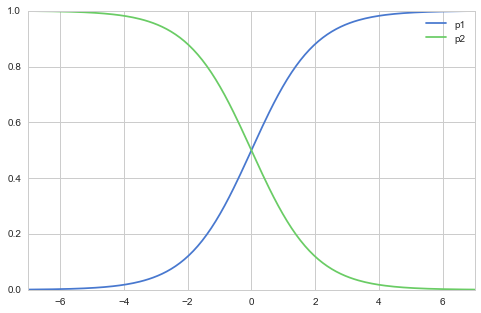

In [11]:
xx = np.linspace(-7, 7, 201)
exp_x = np.exp(xx)
y1 = exp_x/(1+exp_x)
y2 = 1/(1+exp_x)

plt.figure(figsize=(8,5))
plt.xlim(-7, 7)
plt.plot(xx, y1, label="p1")
plt.plot(xx, y2, label="p2")
plt.legend()

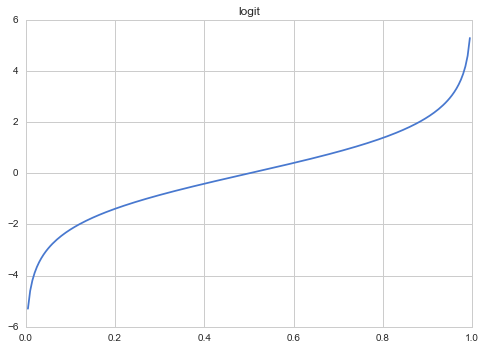

In [12]:
def logit(p):
    return np.log(p/(1-p))

xx = np.linspace(0, 1, 201)
plt.plot(xx, logit(xx))
plt.title("logit")

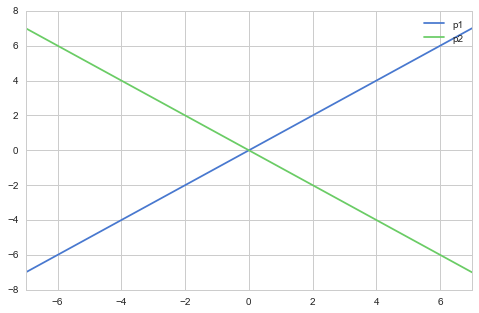

In [13]:
# ロジット変換をして線形に
xx = np.linspace(-7, 7, 201)
exp_x = np.exp(xx)
y1 = exp_x/(1+exp_x)
y2 = 1/(1+exp_x)

plt.figure(figsize=(8,5))
plt.xlim(-7, 7)
plt.plot(xx, logit(y1), label="p1")
plt.plot(xx, logit(y2), label="p2")
plt.legend()

### LDA (Linear Discriminant Analysis)

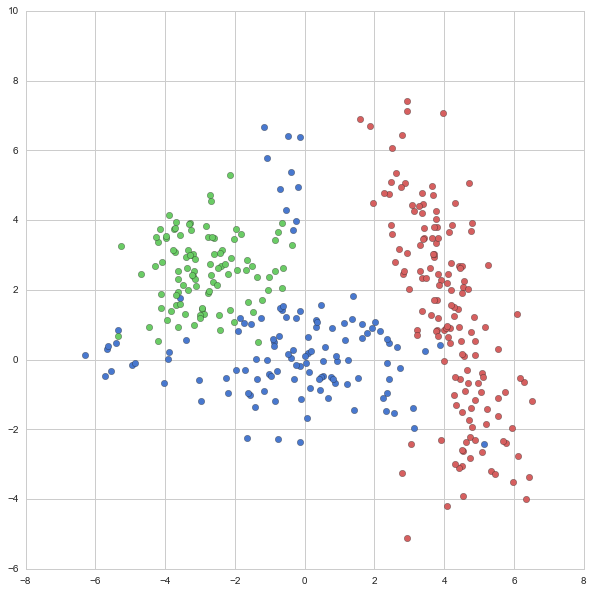

In [14]:
# 図4.1に似たテストデータを無理矢理生成
rd.seed(71)
n_data = 100

cov11 = [[ 4,  0],
        [ 0, 1]]
x11 = st.multivariate_normal.rvs(mean=[ 0, 0], cov=cov11, size=n_data)

cov12 = [[ .1,  -.1],
         [ -.1, .5]]
x12 = st.multivariate_normal.rvs(mean=[-.5, 5], cov=cov12, size=10)

cov13 = [[ .5,  0],
         [ 0, .2]]
x13 = st.multivariate_normal.rvs(mean=[-5, 0], cov=cov13, size=10)

x1 = np.r_[x11, x12, x13]

cov2 = [[ 1,  0],
        [ 0, 1]]
x2 = st.multivariate_normal.rvs(mean=[ -3, 2.5], cov=cov2, size=n_data)

cov31 = [[ 0.5,  -1],
        [ -1, 5]]
x31 = st.multivariate_normal.rvs(mean=[ 4, 2], cov=cov31, size=n_data)
cov32 = [[ 0.2,  -1],
        [ -1, 0.5]]
x32 = st.multivariate_normal.rvs(mean=[ 2, 6], cov=cov31, size=10)
cov33 = [[ 1,  0.7],
        [ 0.7, 2]]
x33 = st.multivariate_normal.rvs(mean=[ 5, -2], cov=cov33, size=40)


x3 = np.r_[x31, x32, x33]

X = np.r_[x1,x2,x3]
y = np.asanyarray([0]*len(x1) + [1]*len(x2) + [2]*len(x3))

plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

In [15]:
# LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

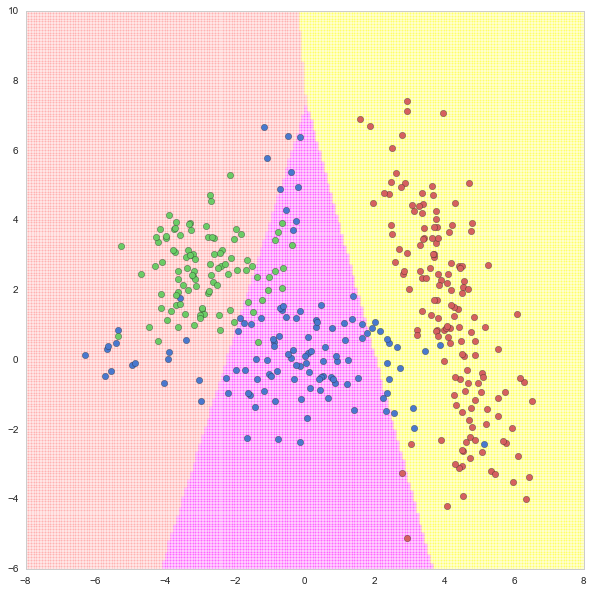

In [16]:
# グラフ表示
xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-6, 10, 201))
z = clf.predict(np.c_[xx.flatten(), yy.flatten()]).reshape(201,201)
plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()

plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

In [17]:
# 2乗と交差積を含む形に拡張

x1_2 = X[:,0]**2
x2_2 = X[:,1]**2
x12 = X[:,0]*X[:,1]

X2 = np.c_[X, x1_2, x2_2, x12]


In [18]:
# 再度LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X2, y)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

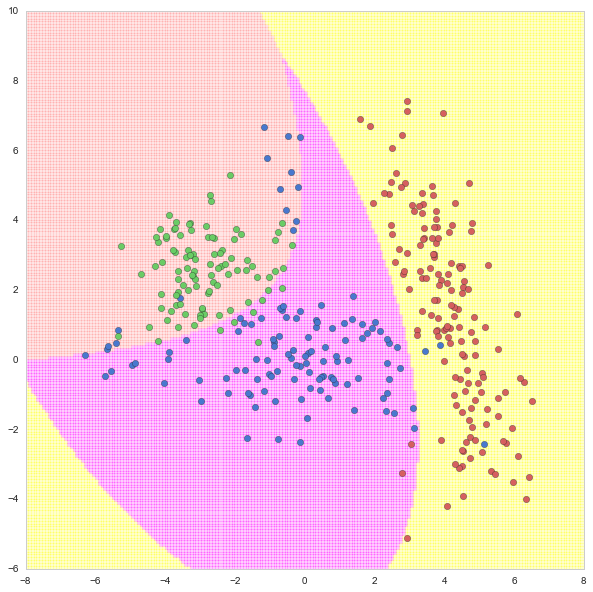

In [19]:
# グラフ表示(2乗と交差積を含むLDA)
xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-6, 10, 201))
z = clf.predict(np.c_[xx.flatten(), yy.flatten(), xx.flatten()**2, yy.flatten()**2, yy.flatten()*xx.flatten()]).reshape(201,201)
plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()

plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

plt.show()

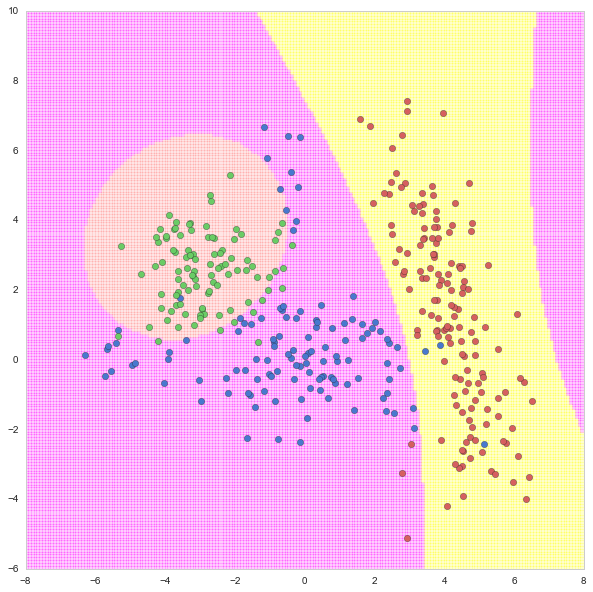

In [20]:
# 2次判別分析
qcls = QuadraticDiscriminantAnalysis()
qcls.fit(X, y)
# グラフ表示
xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-6, 10, 201))
z = qcls.predict(np.c_[xx.flatten(), yy.flatten()]).reshape(201,201)
plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()

plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

###  指示行列の線形回帰

In [21]:
X2.shape

(370, 5)

In [22]:
def one_hot(x, dim):
    ret = np.zeros(dim)
    ret[x] = 1
    return ret

In [23]:
# 切片を追加
XX = np.c_[np.ones(X.shape[0]),X]
XX2 = np.c_[np.ones(X2.shape[0]),X2]

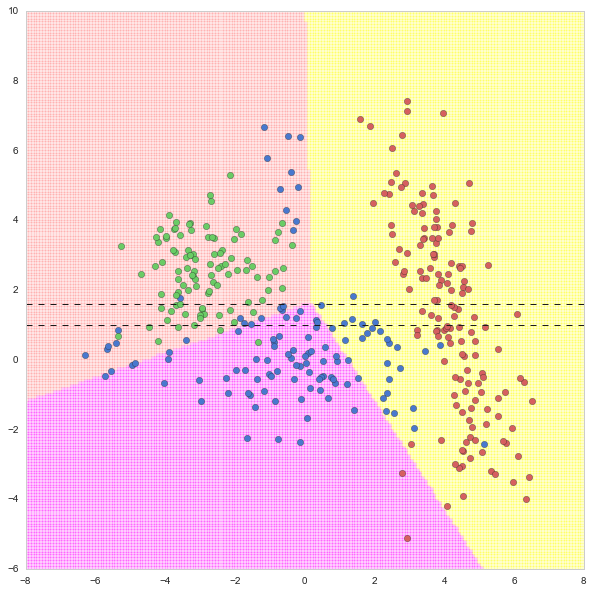

In [24]:
# グラフ表示（2次元の場合）
Y = np.asanyarray(list(map(lambda x:one_hot(x,3), y))) 

inv = np.linalg.inv(np.dot(XX.T, XX))
B = np.dot(np.dot(inv, XX.T), Y)

xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-6, 10, 201))
field = np.c_[np.ones(201*201), xx.flatten(), yy.flatten()]
z = np.argmax(np.dot(field, B), axis=1).reshape(201,201)

plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()

plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

plt.plot([-8, 8],[1, 1], "k--", lw=1)
plt.plot([-8, 8],[1.58, 1.58], "k--", lw=1)

plt.show()

In [25]:
xx = 4
yy = 1
ans = np.dot([1, -8, 1], B)
print(ans)
print(np.sum(ans))

[ 0.75908695  1.00499641 -0.76408336]
1.0


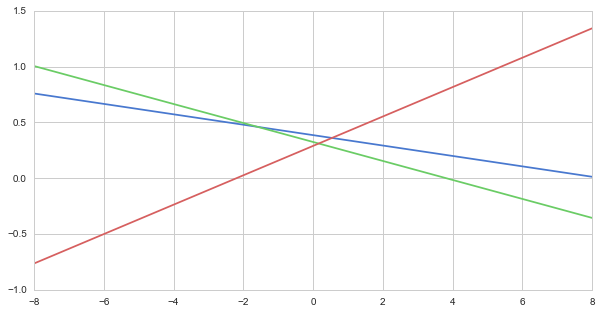

In [26]:
# y = 1の断面
xx = np.linspace(-8, 8, 201)
yy = np.ones(201)
field = np.c_[np.ones(201), xx, yy]
out = np.dot(field, B)

plt.figure(figsize=(10,5))
plt.plot(xx, out[:,0], c="b" )
plt.plot(xx, out[:,1], c="g" )
plt.plot(xx, out[:,2], c="r" )

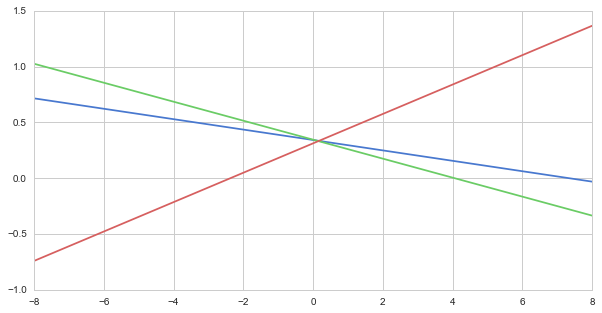

In [27]:
# y = 1.58 の断面
xx = np.linspace(-8, 8, 201)
yy = np.ones(201) + 0.58
field = np.c_[np.ones(201), xx, yy]
out = np.dot(field, B)

plt.figure(figsize=(10,5))
plt.plot(xx, out[:,0], c="b" )
plt.plot(xx, out[:,1], c="g" )
plt.plot(xx, out[:,2], c="r" )

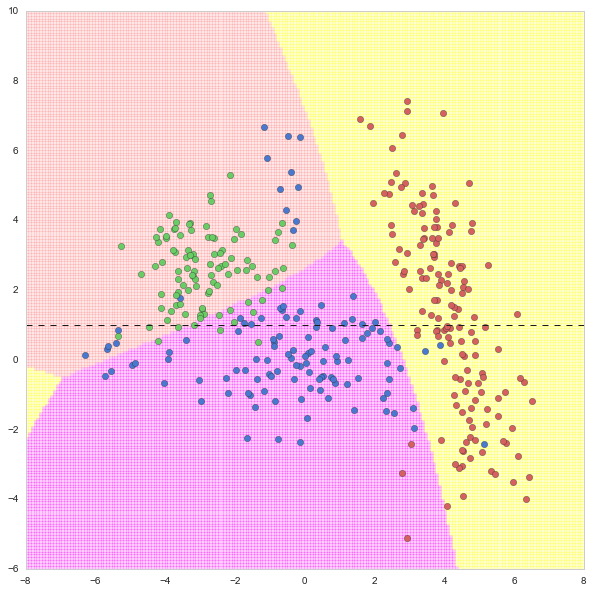

In [28]:
# グラフ表示
Y = np.asanyarray(list(map(lambda x:one_hot(x,3), y))) 

inv = np.linalg.inv(np.dot(XX2.T, XX2))
B = np.dot(np.dot(inv, XX2.T), Y)

xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-6, 10, 201))
field = np.c_[np.ones(201*201), xx.flatten(), yy.flatten(), xx.flatten()**2, 
            yy.flatten()**2, yy.flatten()*xx.flatten()]
z = np.argmax(np.dot(field, B), axis=1).reshape(201,201)
plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()

plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

plt.plot([-8, 8],[1, 1], "k--", lw=1)

plt.show()

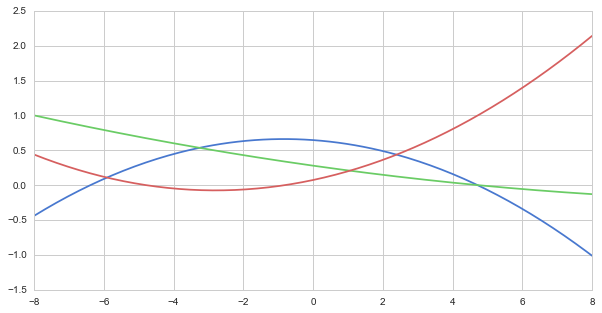

In [29]:
# y = 1の断面
xx = np.linspace(-8, 8, 201)
yy = np.ones(201)
field = np.c_[np.ones(201), xx, yy, xx**2, yy**2, xx*yy]
out = np.dot(field, B)

plt.figure(figsize=(10,5))
plt.plot(xx, out[:,0], c="b" )
plt.plot(xx, out[:,1], c="g" )
plt.plot(xx, out[:,2], c="r" )

plt.show()

### 図4.2のデータ

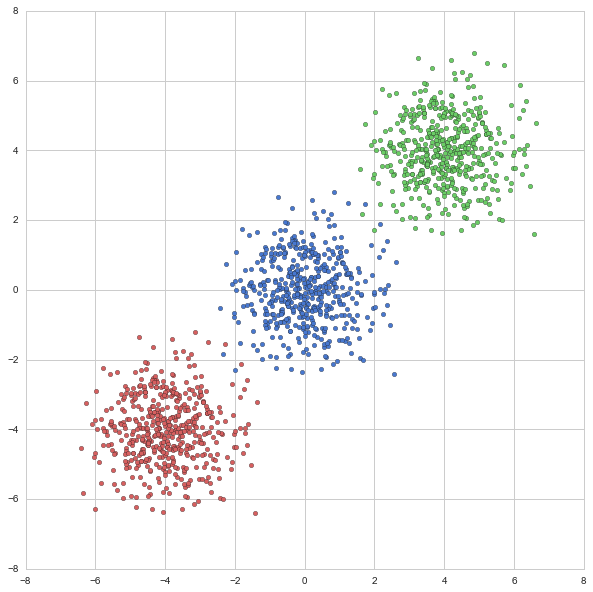

In [30]:
rd.seed(71)
n_data = 500
x1 = st.multivariate_normal.rvs(mean=[ 0, 0], cov=1, size=n_data)
x2 = x1 + [ 4, 4]
x3 = x1 + [-4,-4]
X = np.r_[x1,x2,x3]
XX = np.c_[np.ones(X.shape[0]),X]
y = np.asanyarray([0]*len(x1) + [1]*len(x2) + [2]*len(x3))

plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-8,  8)
plt.scatter(x1[:,0], x1[:,1], s=20, c="b")
plt.scatter(x2[:,0], x2[:,1], s=20, c="g")
plt.scatter(x3[:,0], x3[:,1], s=20, c="r")

plt.show()

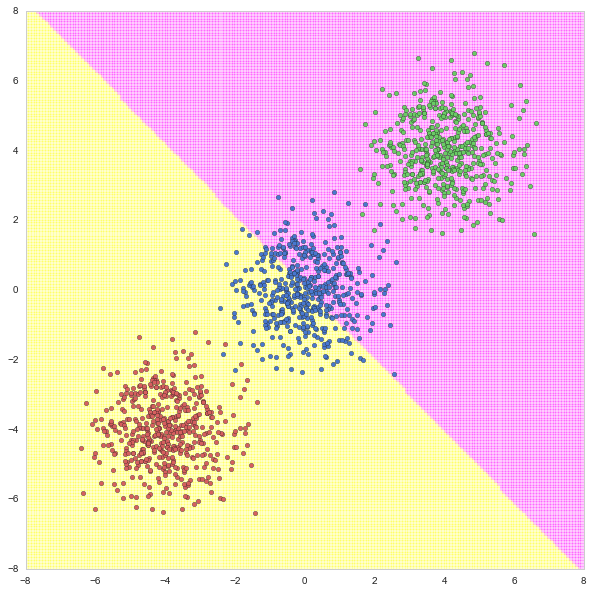

In [31]:
# 線形回帰グラフ表示 マスキングされる例
Y = np.asanyarray(list(map(lambda x:one_hot(x,3), y))) 

inv = np.linalg.inv(np.dot(XX.T, XX))
B = np.dot(np.dot(inv, XX.T), Y)

xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-8, 8, 201))
field = np.c_[np.ones(201*201), xx.flatten(), yy.flatten()]
z = np.argmax(np.dot(field, B), axis=1).reshape(201,201)

# ===== Draw graph =====
plt.figure(figsize=(10,10))

plt.xlim(-8,  8)
plt.ylim(-8,  8)

plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()
plt.scatter(x1[:,0], x1[:,1], s=20)
plt.scatter(x2[:,0], x2[:,1], s=20, c="g")
plt.scatter(x3[:,0], x3[:,1], s=20, c="r")
plt.show()

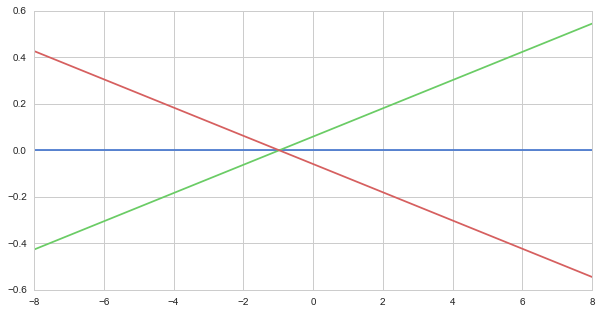

In [32]:
plt.figure(figsize=(10,5))

# y = 0 の断面
xx = np.linspace(-8, 8, 201)
yy = np.ones(201)
field = np.c_[np.zeros(201), xx, yy]
out = np.dot(field, B)

plt.plot(xx, out[:,0], c="b" )
plt.plot(xx, out[:,1], c="g" )
plt.plot(xx, out[:,2], c="r" )
plt.show()

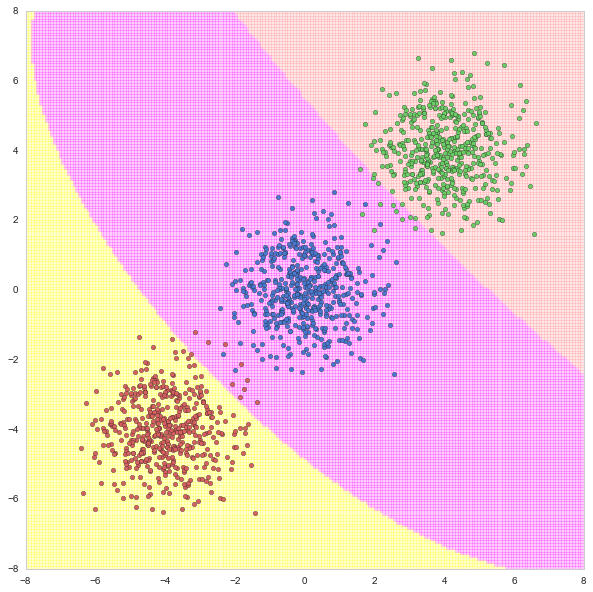

In [33]:
# 線形回帰(2乗と交差積を含む形に拡張)

x1_2 = X[:,0]**2
x2_2 = X[:,1]**2
x12 = X[:,0]*X[:,1]
X2 = np.c_[X, x1_2, x2_2, x12]

# 切片を追加
XX2 = np.c_[np.ones(X2.shape[0]),X2]

# グラフ表示（2次元の場合）マスキングされる例
Y = np.asanyarray(list(map(lambda x:one_hot(x,3), y))) 

inv = np.linalg.inv(np.dot(XX2.T, XX2))
B = np.dot(np.dot(inv, XX2.T), Y)

xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-8, 8, 201))
field = np.c_[np.ones(201*201), xx.flatten(), yy.flatten(), xx.flatten()**2, 
            yy.flatten()**2, yy.flatten()*xx.flatten()]
z = np.argmax(np.dot(field, B), axis=1).reshape(201,201)

# ===== Draw graph =====
plt.figure(figsize=(10,10))

plt.xlim(-8,  8)
plt.ylim(-8,  8)

plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()
plt.scatter(x1[:,0], x1[:,1], s=20)
plt.scatter(x2[:,0], x2[:,1], s=20, c="g")
plt.scatter(x3[:,0], x3[:,1], s=20, c="r")
plt.show()

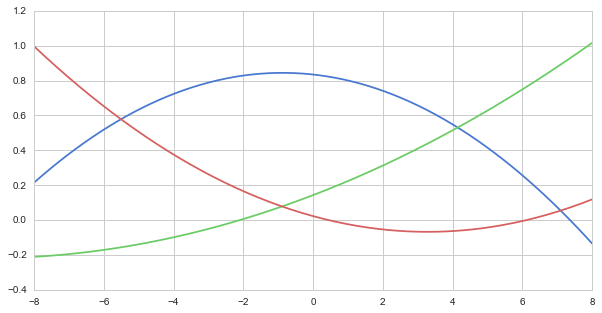

In [34]:
# y = 1の断面
xx = np.linspace(-8, 8, 201)
yy = np.ones(201)
field = np.c_[np.ones(201), xx, yy, xx**2, yy**2, xx*yy]
out = np.dot(field, B)

plt.figure(figsize=(10,5))
plt.plot(xx, out[:,0], c="b" )
plt.plot(xx, out[:,1], c="g" )
plt.plot(xx, out[:,2], c="r" )

plt.show()

### LDA

In [35]:
# LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

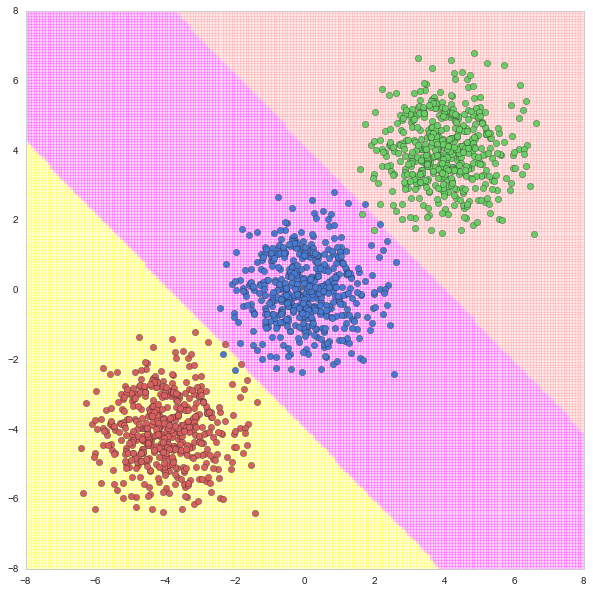

In [36]:
# グラフ表示
xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-8, 8, 201))
z = clf.predict(np.c_[xx.flatten(), yy.flatten()]).reshape(201,201)
plt.figure(figsize=(10,10))
plt.xlim(-8,8)
plt.ylim(-8, 8)
plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()

plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

plt.show()

### 母音データ

In [37]:
# データを読み込み
df_vowel_train = pd.read_csv("vowel.train.csv", sep=",", index_col=0)
df_vowel_test  = pd.read_csv("vowel.test.csv", sep=",", index_col=0)
y_train = df_vowel_train.y.values
X_train = df_vowel_train.iloc[:,1:].values

y_test  = df_vowel_test.y.values
X_test  = df_vowel_test.iloc[:,1:].values

df_vowel_train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


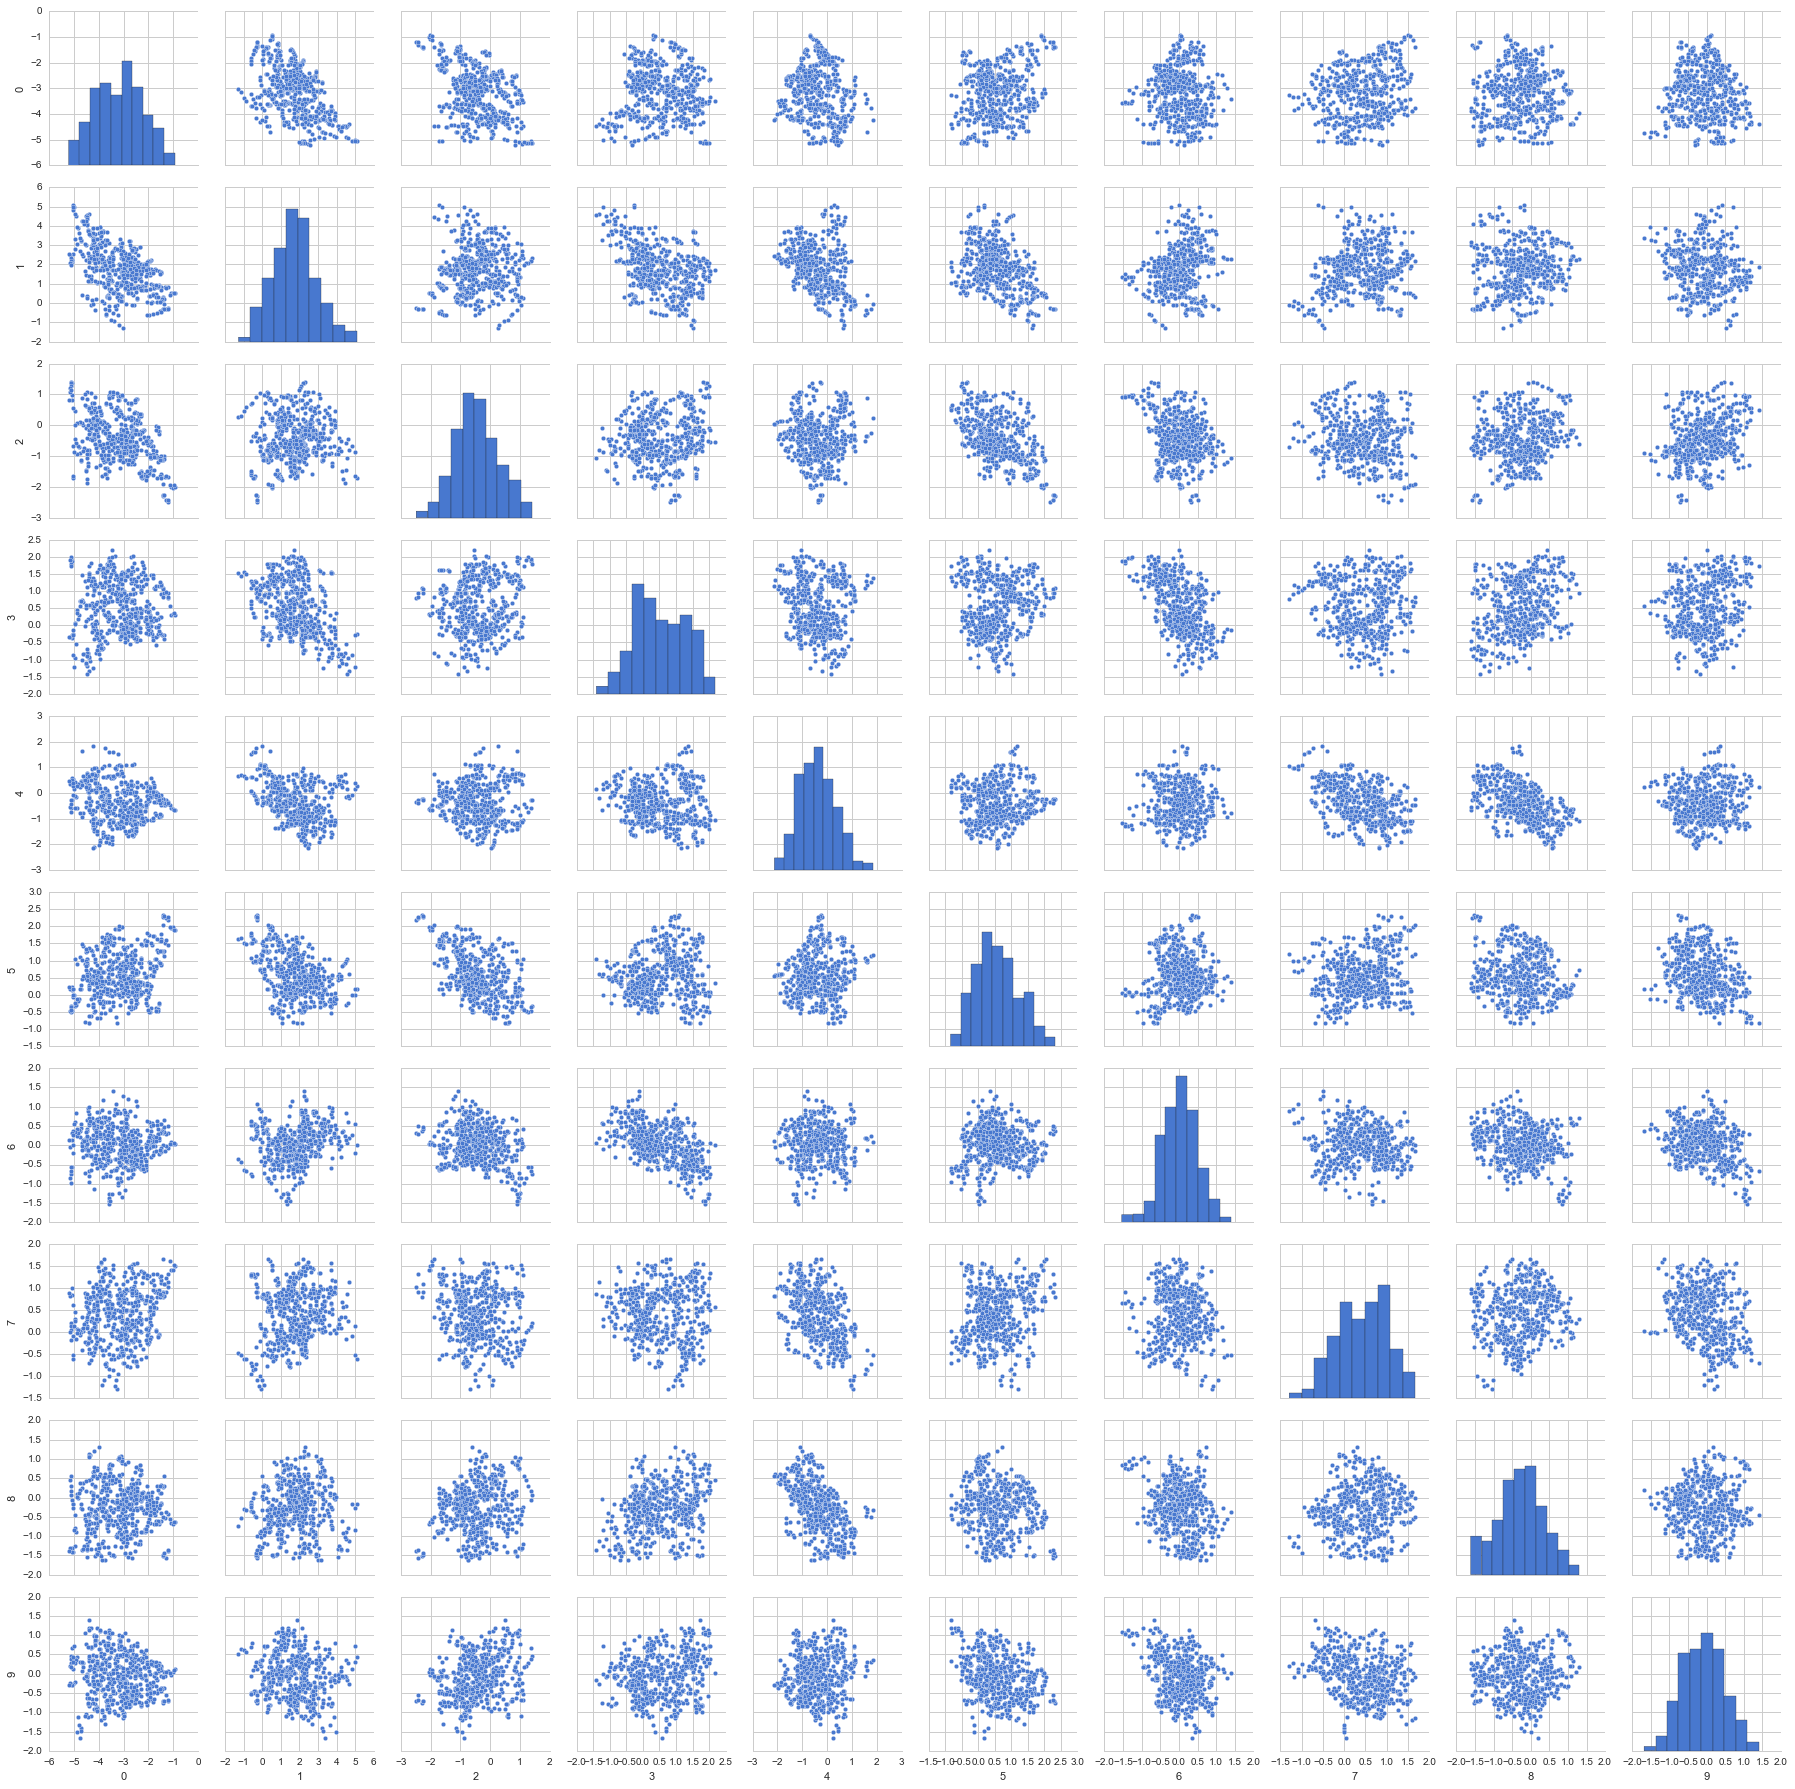

In [38]:
# 訓練データをプロット
sns.pairplot(pd.DataFrame(X_train))

In [40]:
X_train.shape, y_train.shape

((528, 10), (528,))

In [41]:
# まずは性能を測る(線形回帰、線形判別分析、２次判別分析、ロジスティック回帰)

In [42]:
# 線形回帰
X_train2 = np.c_[np.ones(len(X_train)), X_train]
X_test2  = np.c_[np.ones(len(X_test)),  X_test]

y_train2 = np.asanyarray(list(map(lambda x:one_hot(x,11), y_train-1))) 
y_test2  = np.asanyarray(list(map(lambda x:one_hot(x,11), y_test-1))) 

inv = np.linalg.inv(np.dot(X_train2.T, X_train2))
B = np.dot(np.dot(inv, X_train2.T), y_train2)

pred_train = np.argmax(np.dot(X_train2, B), axis=1) + 1
pred_test  = np.argmax(np.dot(X_test2, B), axis=1) + 1

print("------- Linear Regression -------")
print("error rate (train)", 1- accuracy_score(y_train, pred_train))
print("error rate (train)", 1- accuracy_score(y_test,  pred_test))
print(classification_report(y_train, pred_train))
print("==================")
print(classification_report(y_test, pred_test))

------- Linear Regression -------
error rate (train) 0.477272727273
error rate (train) 0.666666666667
             precision    recall  f1-score   support

          1       0.53      0.81      0.64        48
          2       0.66      0.44      0.53        48
          3       0.56      0.62      0.59        48
          4       0.62      0.83      0.71        48
          5       0.51      0.67      0.58        48
          6       0.50      0.10      0.17        48
          7       0.34      0.23      0.27        48
          8       0.47      0.75      0.58        48
          9       0.46      0.25      0.32        48
         10       0.47      0.77      0.59        48
         11       0.68      0.27      0.39        48

avg / total       0.53      0.52      0.49       528

             precision    recall  f1-score   support

          1       0.44      0.98      0.60        42
          2       0.31      0.12      0.17        42
          3       0.38      0.50      0.43    

In [43]:
# LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
pred_train_lda = clf.predict(X_train)
pred_test = clf.predict(X_test)

print("------- Linear Discriminant Analysis -------")
print("error rate (train)", 1- accuracy_score(y_train, pred_train_lda))
print("error rate (train)", 1- accuracy_score(y_test,  pred_test))
print(classification_report(y_train, pred_train_lda))
print("==================")
print(classification_report(y_test, pred_test))

------- Linear Discriminant Analysis -------
error rate (train) 0.316287878788
error rate (train) 0.556277056277
             precision    recall  f1-score   support

          1       0.76      0.67      0.71        48
          2       0.67      0.58      0.62        48
          3       0.76      0.88      0.82        48
          4       0.86      0.75      0.80        48
          5       0.63      0.69      0.66        48
          6       0.61      0.48      0.53        48
          7       0.62      0.69      0.65        48
          8       0.76      0.71      0.73        48
          9       0.66      0.60      0.63        48
         10       0.59      0.69      0.63        48
         11       0.64      0.79      0.71        48

avg / total       0.69      0.68      0.68       528

             precision    recall  f1-score   support

          1       0.47      0.67      0.55        42
          2       0.39      0.38      0.39        42
          3       0.47      0.38   

In [44]:
# 2次LDAにかける
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)


print("------- Quadratic Discriminant Analysis -------")
print("error rate (train)", 1- accuracy_score(y_train, pred_train))
print("error rate (train)", 1- accuracy_score(y_test,  pred_test))
print(classification_report(y_train, pred_train))
print("==================")
print(classification_report(y_test, pred_test))

------- Quadratic Discriminant Analysis -------
error rate (train) 0.0113636363636
error rate (train) 0.528138528139
             precision    recall  f1-score   support

          1       0.98      1.00      0.99        48
          2       0.98      1.00      0.99        48
          3       1.00      0.98      0.99        48
          4       1.00      1.00      1.00        48
          5       1.00      0.98      0.99        48
          6       0.98      0.94      0.96        48
          7       1.00      1.00      1.00        48
          8       1.00      1.00      1.00        48
          9       0.98      1.00      0.99        48
         10       1.00      0.98      0.99        48
         11       0.96      1.00      0.98        48

avg / total       0.99      0.99      0.99       528

             precision    recall  f1-score   support

          1       0.56      0.88      0.69        42
          2       0.48      0.52      0.50        42
          3       0.75      0.2

In [45]:
lgs = LogisticRegression()
lgs.fit(X_train, y_train)
pred_train = lgs.predict(X_train)
pred_test  = lgs.predict(X_test)

print("------- Logistic Regression -------")
print("error rate (train)", 1- accuracy_score(y_train, pred_train))
print("error rate (train)", 1- accuracy_score(y_test,  pred_test))
print(classification_report(y_train, pred_train))
print("==================")
print(classification_report(y_test, pred_test))

------- Logistic Regression -------
error rate (train) 0.407196969697
error rate (train) 0.636363636364
             precision    recall  f1-score   support

          1       0.67      0.81      0.74        48
          2       0.75      0.50      0.60        48
          3       0.70      0.67      0.68        48
          4       0.83      0.81      0.82        48
          5       0.54      0.62      0.58        48
          6       0.63      0.40      0.49        48
          7       0.30      0.19      0.23        48
          8       0.58      0.79      0.67        48
          9       0.50      0.48      0.49        48
         10       0.48      0.69      0.56        48
         11       0.55      0.56      0.56        48

avg / total       0.59      0.59      0.58       528

             precision    recall  f1-score   support

          1       0.55      0.79      0.65        42
          2       0.36      0.24      0.29        42
          3       0.42      0.38      0.40  

In [46]:
# LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
pred_train_lda = clf.predict(X_train)
pred_test = clf.predict(X_test)

def col_map(x):
    colors = ['gold', 'red', 'blue', 'green', 'purple', 'orange',
              'pink', 'yellow', '#afeeee', '#B47CC7', '#8dd3c7'] 
    return colors[x-1]

# LDAで予測した値でカラーを付ける
pred_cols_lda = list(map(col_map, pred_train_lda))

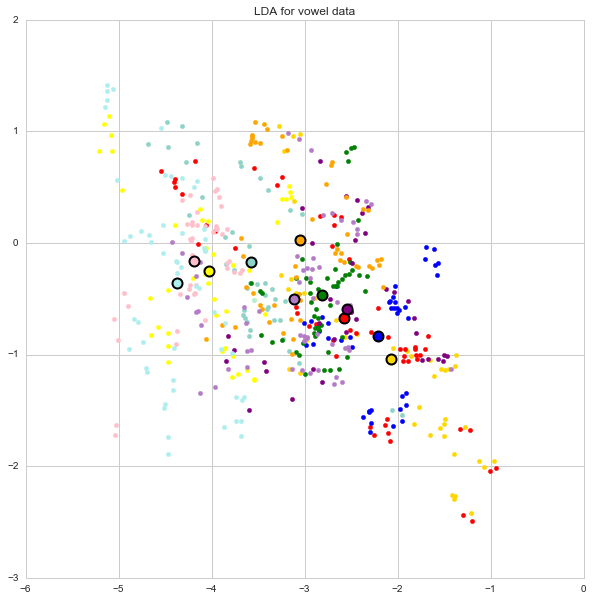

In [47]:
# 訓練データの最初の２変数を表示
converted = X_train[:,[0,2]]

plt.figure(figsize=(10,10))
for i in range(1,12):
    plot_data = converted[pred_train_lda == i]
    mean = np.mean(plot_data[:,0:2], axis=0)
    #print(mean)
    plt.scatter(plot_data[:,0], plot_data[:,1], s=20, color=col_map(i-1))
    plt.scatter(mean[0], mean[1], s=100, color=col_map(i-1), edgecolors="black", linewidths=2, zorder=100)
plt.title("LDA for vowel data")
plt.show()

[ 0.35493568  0.55178926  0.7128186   0.80627323  0.86312868  0.90954839
  0.94587019  0.97397284  0.99167871  1.        ]


(0.3, 1.1)

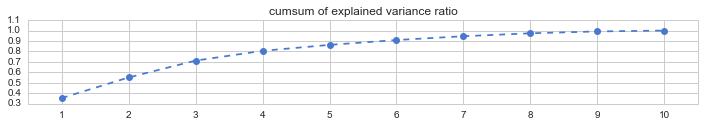

In [48]:
# PCA
pca = PCA()
pca_fit = pca.fit(X_train)
np.cumsum(pca_fit.explained_variance_ratio_)

print(np.cumsum(pca_fit.explained_variance_ratio_))  # 3次元で71%しか説明されない？？？
plt.figure(figsize=(12,1.5))
plt.plot(range(1,11),np.cumsum(pca_fit.explained_variance_ratio_), "o--")
plt.title("cumsum of explained variance ratio")
plt.xticks(range(1,11))
plt.xlim(0.5, 10.5)
plt.ylim(0.3, 1.1)


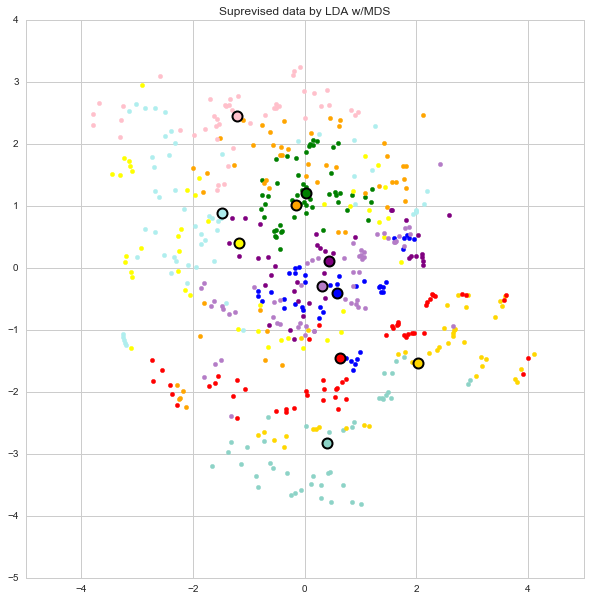

In [49]:
# MDSで２次元に落とす
mds = MDS(n_components=2, random_state=71)
converted = mds.fit_transform(X_train)

plt.figure(figsize=(10,10))
for i in range(1,12):
    plot_data = converted[pred_train_lda == i]
    mean = np.mean(plot_data[:,0:2], axis=0)
    #print(mean)
    plt.scatter(plot_data[:,0], plot_data[:,1], s=20, color=col_map(i-1))
    plt.scatter(mean[0], mean[1], s=100, color=col_map(i-1), edgecolors="black", linewidths=2, zorder=100)
plt.title("Suprevised data by LDA w/MDS")
plt.show()

(0, 0.5)

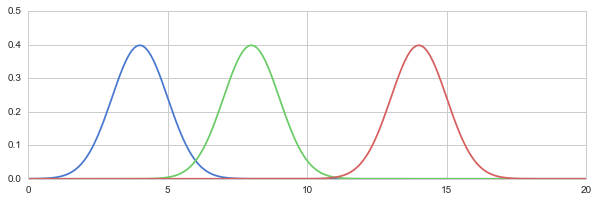

In [52]:
xx = np.linspace(0, 20, 201)

plt.figure(figsize=(10,3))
plt.plot(xx, st.norm.pdf(xx, loc=4,scale=1))
plt.plot(xx, st.norm.pdf(xx, loc=8,scale=1))
plt.plot(xx, st.norm.pdf(xx, loc=14,scale=1))
plt.xlim(0,20)
plt.ylim(0,.5)

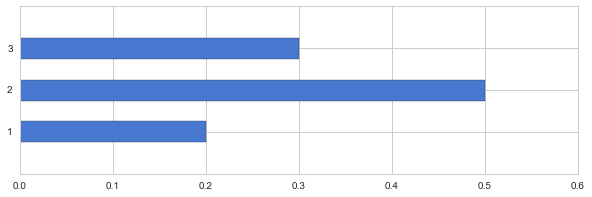

In [54]:

plt.figure(figsize=(10,3))
plt.ylim(0, 4)
plt.xlim(0, 0.6)
plt.barh([0.75, 1.75, 2.75],[0.2, 0.5,0.3], height=0.5)
plt.yticks([1,2,3])
plt.show()

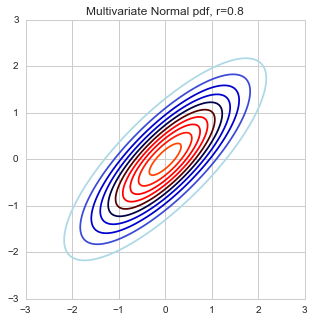

In [55]:
@interact(r=(-1, 1,.1))
def draw_multi_norm(r=0.5):
    sign = np.sign(r)
    r = 0.999999999*sign if np.abs(r) == 1 else r 
    
    cov =[[  1,  r],
          [  r,  1]]

    xx, yy = np.meshgrid(np.linspace(-4,  4, 201), np.linspace(-4, 4, 201))
    data = st.multivariate_normal.pdf(x=np.c_[xx.flatten(), yy.flatten()], mean=[0, 0], cov=cov).reshape(201, 201)

    # グラフ表示
    plt.figure(figsize=(5,5))
    plt.xlim(-3,3)
    plt.ylim(-3,3)

    plt.contour(xx, yy, data, 10, cmap=cm)
    plt.title("Multivariate Normal pdf, r={}".format(r))
    plt.show()

### 図4.5

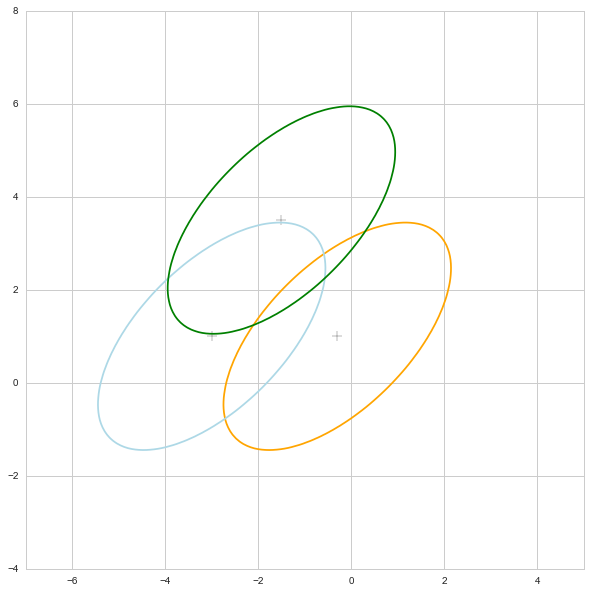

In [56]:
cov =[[  1,0.6],
      [0.6,  1]]

m1 = [-0.3, 1]
m2 = [-3, 1]
m3 = [-1.5, 3.5]

xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-8, 8, 201))
cm1 = generate_cmap(['orange','orange','orange'])
cm2 = generate_cmap(['lightblue','lightblue','lightblue'])
cm3 = generate_cmap(['green','green','green'])

z = []
for m in [m1, m2, m3]:
    z.append(st.multivariate_normal.pdf(x=np.c_[xx.flatten(), yy.flatten()], mean=m, cov=cov).reshape(201, 201))

# グラフ表示
plt.figure(figsize=(10,10))
plt.xlim(-7,5)
plt.ylim(-4,8)

for data, c in zip(z, [cm1, cm2, cm3]):
    plt.contour(xx, yy, data, [0.01], cmap=c)


for m in [m1, m2, m3]:
    plt.scatter(m[0], m[1], marker="+", c="k", s=100)

plt.show()

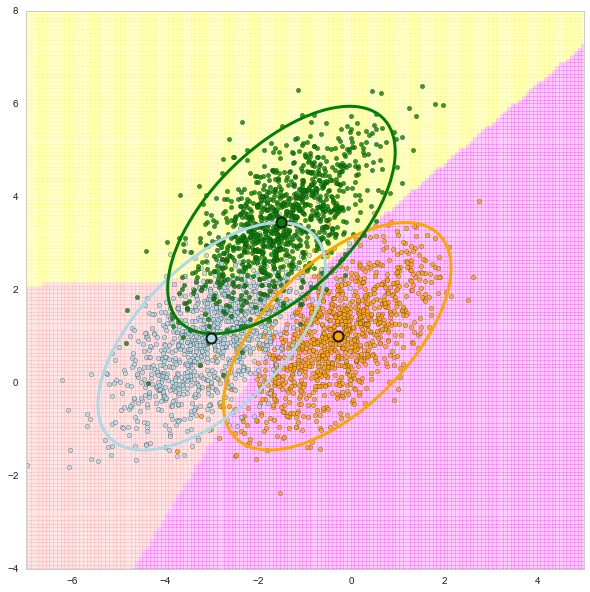

In [57]:
rd.seed(71)
rvs1 = st.multivariate_normal.rvs(mean=m1, cov=cov, size=1000)
rvs2 = st.multivariate_normal.rvs(mean=m2, cov=cov, size=1000)
rvs3 = st.multivariate_normal.rvs(mean=m3, cov=cov, size=1000)
y = np.asanyarray([0]*len(rvs1) + [1]*len(rvs2) + [2]*len(rvs3))

X = np.r_[rvs1, rvs2, rvs3]

# LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

plt.figure(figsize=(10,10))
plt.xlim(-7,5)
plt.ylim(-4,8)

#xx, yy = np.meshgrid(np.linspace(-7, 5, 201), np.linspace(-4, 8, 201))
z2 = clf.predict(np.c_[xx.flatten(), yy.flatten()]).reshape(201,201)

plt.pcolor(xx, yy, z2, alpha=0.2)
plt.spring()

for r,c in zip([rvs1, rvs2, rvs3], ["orange", "lightblue", "green"] ):
    plt.scatter(r[:,0], r[:,1], c=c, s=20, alpha=0.8)
    mm = np.mean(r[:,0:2],axis=0)
    plt.scatter(mm[0], mm[1], s=100, edgecolors="k", linewidths=2, zorder=100, c=c)

    
for data, c in zip(z, [cm1, cm2, cm3]):
    plt.contour(xx, yy, data, [0.01], cmap=c, linewidths=3)

plt.show()

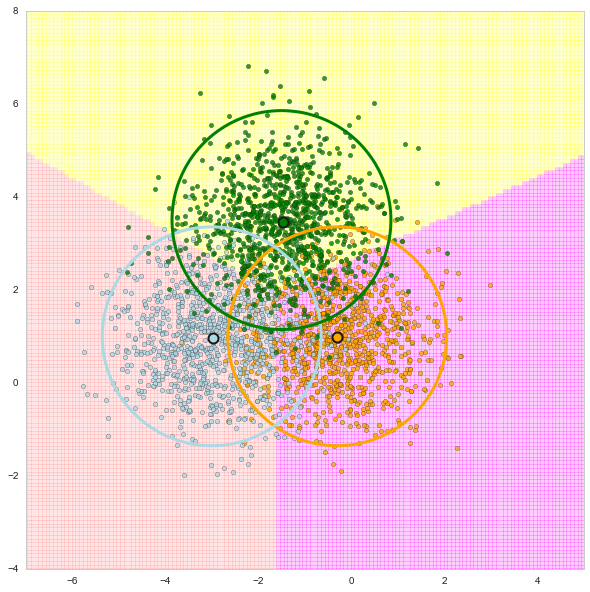

In [58]:

rd.seed(71)

# 共分散成分0の場合
cov =[[  1, 0],
      [  0, 1]]

m1 = [-0.3, 1]
m2 = [-3, 1]
m3 = [-1.5, 3.5]

xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-8, 8, 201))
cm1 = generate_cmap(['orange','orange','orange'])
cm2 = generate_cmap(['lightblue','lightblue','lightblue'])
cm3 = generate_cmap(['green','green','green'])

z = []
for m in [m1, m2, m3]:
    z.append(st.multivariate_normal.pdf(x=np.c_[xx.flatten(), yy.flatten()], mean=m, cov=cov).reshape(201, 201))

rvs1 = st.multivariate_normal.rvs(mean=m1, cov=cov, size=1000)
rvs2 = st.multivariate_normal.rvs(mean=m2, cov=cov, size=1000)
rvs3 = st.multivariate_normal.rvs(mean=m3, cov=cov, size=1000)
y = np.asanyarray([0]*len(rvs1) + [1]*len(rvs2) + [2]*len(rvs3))

X = np.r_[rvs1, rvs2, rvs3]

# LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

plt.figure(figsize=(10,10))
plt.xlim(-7,5)
plt.ylim(-4,8)

z2 = clf.predict(np.c_[xx.flatten(), yy.flatten()]).reshape(201,201)

plt.pcolor(xx, yy, z2, alpha=0.2)
plt.spring()

for r,c in zip([rvs1, rvs2, rvs3], ["orange", "lightblue", "green"] ):
    plt.scatter(r[:,0], r[:,1], c=c, s=20, alpha=0.8)
    mm = np.mean(r[:,0:2],axis=0)
    plt.scatter(mm[0], mm[1], s=100, edgecolors="k", linewidths=2, zorder=100, c=c)

    
for data, c in zip(z, [cm1, cm2, cm3]):
    plt.contour(xx, yy, data, [0.01], cmap=c, linewidths=3)

plt.show()

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k -{1 \over 2} \mu_k^T\Sigma^{-1}\mu_k + \log \pi_k
$$

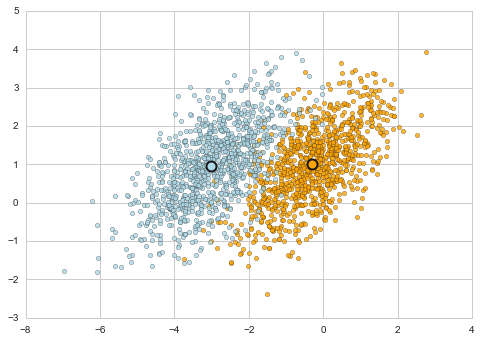

In [59]:
cov =[[  1,0.6],
      [0.6,  1]]

m1 = [-0.3, 1]
m2 = [-3, 1]

cm1 = generate_cmap(['orange','orange','orange'])
cm2 = generate_cmap(['lightblue','lightblue','lightblue'])
cm3 = generate_cmap(['green','green','green'])

rd.seed(71)
rvs1 = st.multivariate_normal.rvs(mean=m1, cov=cov, size=1000)
rvs2 = st.multivariate_normal.rvs(mean=m2, cov=cov, size=1000)
y = np.asanyarray([0]*len(rvs1) + [1]*len(rvs2) )

X = np.r_[rvs1, rvs2]

mm = np.zeros((2,2))
for i, r, c in zip(range(2), [rvs1, rvs2], ["orange", "lightblue"] ):
    plt.scatter(r[:,0], r[:,1], c=c, s=20, alpha=0.8)
    mm[i] = np.mean(r[:,0:2],axis=0)
    plt.scatter(mm[i][0], mm[i][1], s=100, edgecolors="k", linewidths=2, zorder=100, c=c)
    

$$
\hat{\Sigma} = \sum_{k=1}^K \sum_{g_i=k} (x_i - \hat{\mu_k})( x_i - \hat{\mu_k})^T / (N-K)
$$

In [60]:
deviation = np.r_[rvs1 - mm[0], rvs2 - mm[1]]
S_hat = np.dot(deviation.T, deviation)/(len(deviation)-2)

In [61]:
S_hat

array([[ 1.01154344,  0.63024089],
       [ 0.63024089,  1.02253096]])

$$
x^T\hat{\Sigma}^{-1} (\hat{\mu}_2 - \hat{\mu}_1) >
{1 \over 2} (\hat{\mu}_2 + \hat{\mu}_1)^T \hat{\Sigma}^{-1}(\hat{\mu}_2 - \hat{\mu}_1)
-\log {N_2 \over N_1}
$$

(-4, 5)

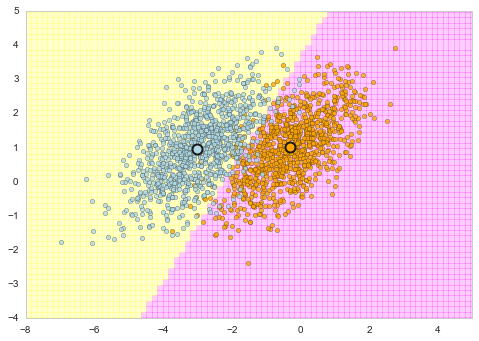

In [62]:

def calc(x, mu1, mu2, S, n1, n2):
    x = np.asanyarray(x)
    S_inv = np.linalg.inv(S)
    left  = np.dot(x.T, np.dot(S_inv,(mu2-mu1)))
    right = 0.5 * np.dot((mu2+ mu1).T, np.dot(S_inv, (mu2-mu1))) - np.log(n2/n1)
    return 1 if left  > right else 0

xx, yy = np.meshgrid(np.linspace(-8,  8, 101), np.linspace(-8, 8, 101))
z = np.asanyarray([calc([x, y], mm[0], mm[1], S_hat, len(rvs1), len(rvs2)) for x, y in zip(xx.flatten(), yy.flatten())])

plt.pcolor(xx, yy, z.reshape((101,101)), alpha=0.2)


mm = np.zeros((2,2))
for i, r, c in zip(range(2), [rvs1, rvs2], ["orange", "lightblue"] ):
    plt.scatter(r[:,0], r[:,1], c=c, s=20, alpha=0.8)
    mm[i] = np.mean(r[:,0:2],axis=0)
    plt.scatter(mm[i][0], mm[i][1], s=100, edgecolors="k", linewidths=2, zorder=100, c=c)
    

plt.xlim(-8,5)
plt.ylim(-4,5)



(-5, 7)

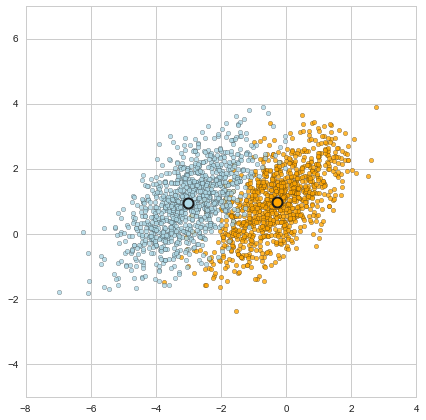

In [63]:
# 球状化の確認
cov =[[  1,0.6],
      [0.6,  1]]

m1 = [-0.3, 1]
m2 = [-3, 1]

cm1 = generate_cmap(['orange','orange','orange'])
cm2 = generate_cmap(['lightblue','lightblue','lightblue'])
cm3 = generate_cmap(['green','green','green'])

rd.seed(71)
rvs1 = st.multivariate_normal.rvs(mean=m1, cov=cov, size=1000)
rvs2 = st.multivariate_normal.rvs(mean=m2, cov=cov, size=1000)
y = np.asanyarray([0]*len(rvs1) + [1]*len(rvs2) )
plt.figure(figsize=(7,7))
X = np.r_[rvs1, rvs2]
mm = np.zeros((2,2))
for i, r, c in zip(range(2), [rvs1, rvs2], ["orange", "lightblue"] ):
    plt.scatter(r[:,0], r[:,1], c=c, s=20, alpha=0.8)
    mm[i] = np.mean(r[:,0:2],axis=0)
    plt.scatter(mm[i][0], mm[i][1], s=100, edgecolors="k", linewidths=2, zorder=100, c=c)
    

plt.xlim(-8,4)
plt.ylim(-5,7)

$$
X^* \leftarrow {\bf D}^{-1/2} {\bf U}^T X
$$

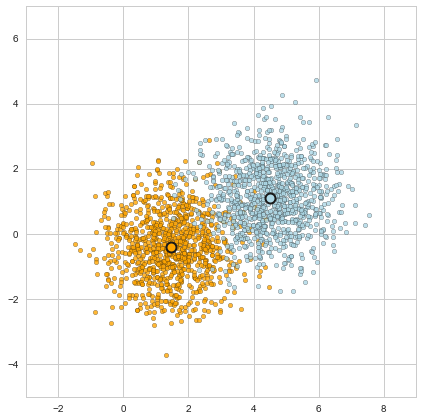

In [65]:
def sphere(X):
    S = np.cov(X.T)
    U = np.linalg.eig(S)[1]
    D = np.diag(np.linalg.eigvals(S))
    D_rt = scipy.linalg.sqrtm(D)
    D_rt_inv = np.linalg.inv(D_rt)
    return np.dot(D_rt_inv, np.dot(U.T, X.T)).T

# 球状化
plt.figure(figsize=(7,7))
rvs1_sp = sphere(rvs1)
rvs2_sp = sphere(rvs2)

# X = np.r_[rvs1_sp, rvs2_sp]
mm = np.zeros((2,2))
for i, r, c in zip(range(2), [rvs1_sp, rvs2_sp], ["orange", "lightblue"] ):
    plt.scatter(r[:,0], r[:,1], c=c, s=20, alpha=0.8)
    mm[i] = np.mean(r[:,0:2],axis=0)
    plt.scatter(mm[i][0], mm[i][1], s=100, edgecolors="k", linewidths=2, zorder=100, c=c)
    

plt.xlim(-3,9)
plt.ylim(-5,7)
plt.show()

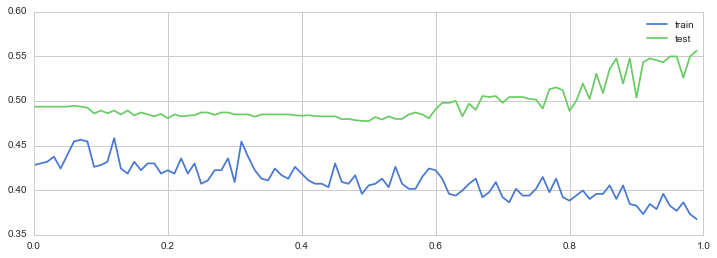

In [66]:
# Rで行った結果をPythonでグラフ描画
df_rda_result = pd.read_csv("./R/df_result.csv", index_col=0)
df_rda_result.index = np.linspace(0,1,101)

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
df_rda_result.plot(ax=ax)

### LDAの最適部分空間の求め方

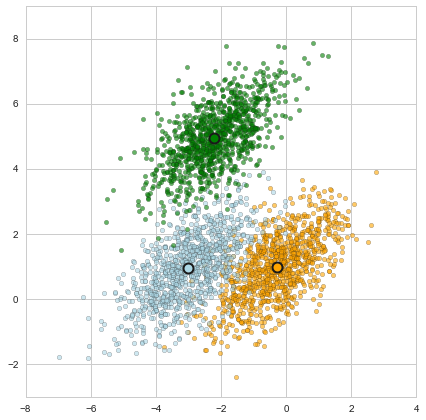

In [75]:
# 共通の共分散行列
cov = np.asanyarray(
      [[  1,0.6],
       [0.6,  1]])

m = np.zeros((3,2))
m[0] = np.asanyarray([-0.3, 1])
m[1] = np.asanyarray([-3, 1])
m[2] = np.asanyarray([-2.2, 5])

cm = []
cm.append(generate_cmap(['orange','orange','orange']))
cm.append(generate_cmap(['lightblue','lightblue','lightblue']))
cm.append(generate_cmap(['green','green','green']))


rd.seed(71)
n_class = 3
n_dim = cov.shape[0]
n_rand = 1000
X = np.zeros((n_class, n_rand, n_dim))
for i in range(n_class):
    X[i] = st.multivariate_normal.rvs(mean=m[i], cov=cov, size=n_rand)
    
y = np.asanyarray([[i]*n_rand for i in range(n_class)]).flatten()

cols = ["orange", "lightblue", "green"]
mm = np.zeros((3, 2))
plt.figure(figsize=(7,7))
for i in range(n_class):
    plt.scatter(X[i][:,0], X[i][:,1], c=cols[i], s=20, alpha=0.6)
    mm[i] = np.mean(X[i][:,0:2],axis=0)
    plt.scatter(mm[i][0], mm[i][1], s=100, edgecolors="k", linewidths=2, zorder=100, c=cols[i])

plt.xlim(-8,4)
plt.ylim(-3,9)
plt.show()

[-1.23290493  1.00301738]


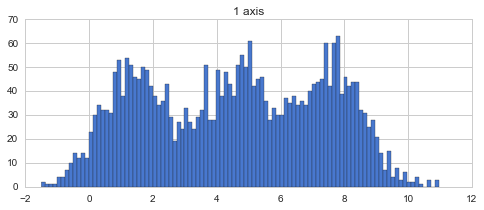

[-0.30483077 -0.78126293]


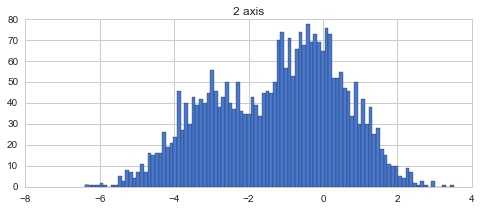

In [76]:
M = mm
deviation = np.asanyarray([X[i] - mm[i] for i in range(n_class)]).reshape(n_class*n_rand, n_dim)
W = np.dot(deviation.T, deviation)/(len(deviation)-2)
W_rt_inv = np.linalg.inv(scipy.linalg.sqrtm(W))
M_star = np.dot(M, W_rt_inv)
B = np.cov(M_star.T)
V_star = np.linalg.eig(B)[1]
D_B = np.diag(np.linalg.eigvals(B))

v = []
for i in range(n_dim):
    plt.figure(figsize=(8,3))
    v_st = V_star.T[:,i]
    v.append(np.dot(W_rt_inv,v_st))
    print(v[i])
    z = np.dot(v[i], X.reshape(n_class*n_rand, n_dim).T)
    #plt.scatter(z[:,0], z[:,1])
    plt.hist(z, bins=100)
    plt.title("{} axis".format(i+1))
    plt.show()


In [78]:
v

[array([-1.23290493,  1.00301738]), array([-0.30483077, -0.78126293])]

(-3, 9)

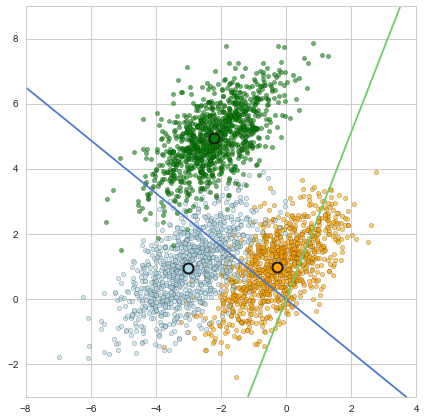

In [79]:
plt.figure(figsize=(7,7))
for i in range(n_class):
    plt.scatter(X[i][:,0], X[i][:,1], c=cols[i], s=20, alpha=0.6)
    mm[i] = np.mean(X[i][:,0:2],axis=0)
    plt.scatter(mm[i][0], mm[i][1], s=100, edgecolors="k", linewidths=2, zorder=100, c=cols[i])

for i in range(len(v)):
    plt.plot([15*-v[i][0], 15*v[i][0]], [15*-v[i][1], 15*v[i][1]])
    
plt.xlim(-8,4)
plt.ylim(-3,9)